In [7]:
import numpy as np
import capytaine as cpt
import matplotlib.pyplot as plt
from scipy.optimize import brute
import gmsh
import pygmsh
import xarray as xr
import scipy.io
import capytaine.io.mesh_writers

## set colorblind-friendly colormap for plots
plt.style.use('tableau-colorblind10')

import logging
logging.getLogger().setLevel(logging.INFO)

In [8]:
def change_draft(draft):

    z_cg = 3 - draft # 3 m above the bottom of the sphere
    z_cg = -2 # cg is always 2 me below the center

    mesh_size_factor = 0.24

    with pygmsh.occ.Geometry() as geom:
        gmsh.option.setNumber('Mesh.MeshSizeFactor', mesh_size_factor)
        rect = geom.add_box([-10, -10, draft-3],[20, 20, 20])
        cyl = geom.add_ball([0, 0, -z_cg],5)
        geom.boolean_difference(cyl, rect)
        mesh = geom.generate_mesh()

    rigid_sphere = cpt.FloatingBody(mesh, center_of_mass=(0, 0, z_cg))

    rigid_sphere.show_matplotlib()
    #rigid_sphere.show()

    cpt.io.mesh_writers.write_GDF(f'draft{round(draft)}.gdf',rigid_sphere.mesh.vertices, rigid_sphere.mesh.faces, ulen=1)

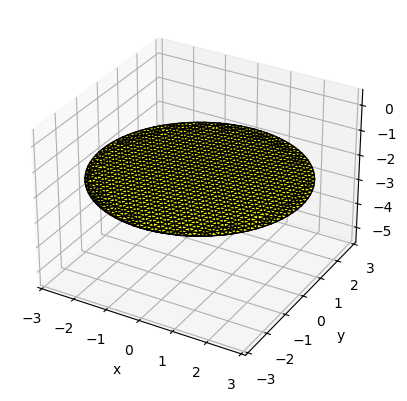

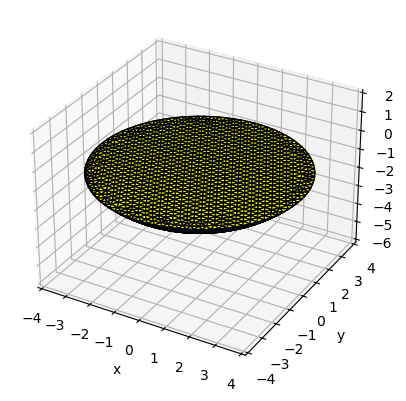

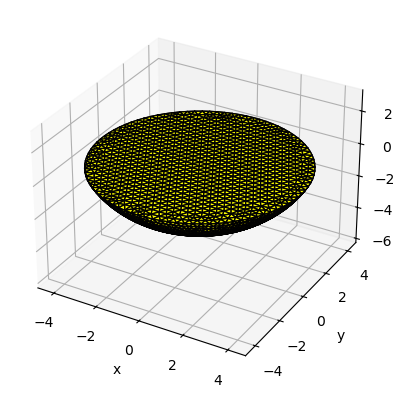

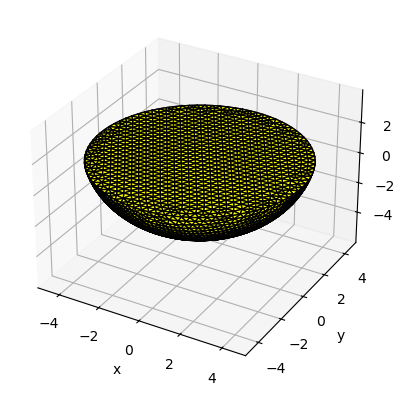

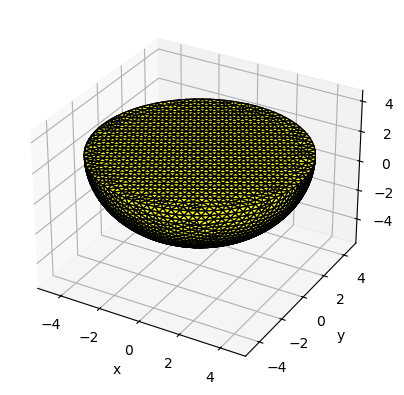

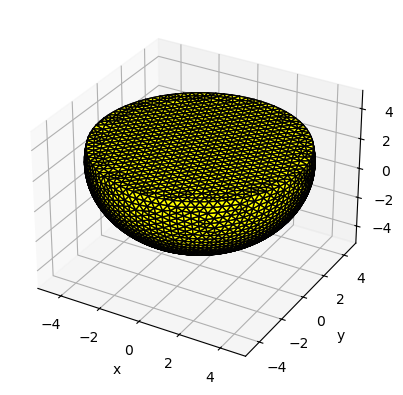

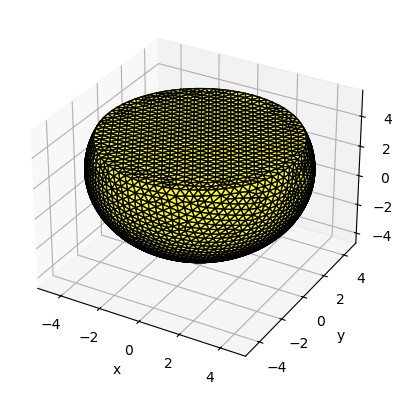

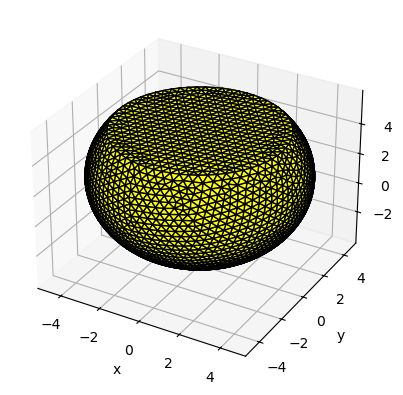

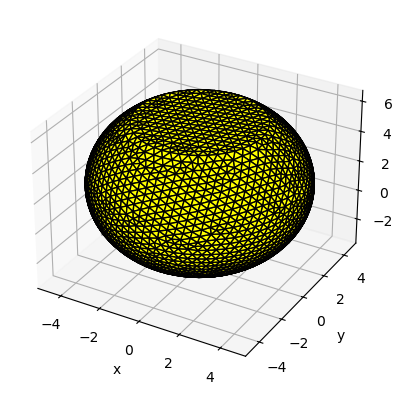

In [9]:
draft_vals = np.linspace(1,9,9)

for draft in draft_vals:
    change_draft(draft) 
